DIAGNOSTICO DE CALIDAD DE DATOS

In [1]:
%load_ext watermark
%watermark

Last updated: 2023-05-25T21:15:59.256532-03:00

Python implementation: CPython
Python version       : 3.10.9
IPython version      : 8.10.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
vehiculos=pd.read_csv(r"C:\Users\54296\Desktop\Data Science\Analisis de datos\vehiculos.1_original.csv")

In [4]:
vehiculos.shape

(36791, 11)

### DUPLIACADOS

Vemos si hay records duplicados

In [5]:
vehiculos['modelo_unico'] = vehiculos.fabricante.str.cat([vehiculos.modelo, vehiculos.year.apply(str)],sep='-') ##columnas aaux, donde contatenamos columnas, modelo y año 

In [6]:
vehiculos.modelo_unico.value_counts()

Jeep-Cherokee/Wagoneer-1985          19
Ford-F150 Pickup 2WD-1984            16
GMC-C15 Pickup 2WD-1984              16
Chevrolet-S10 Pickup 2WD-1984        16
GMC-S15 Pickup 2WD-1984              16
                                     ..
Mercedes-Benz-C220-1995               1
Mercedes-Benz-C220-1994               1
Mercedes-Benz-AMG SLK55-2016          1
Mercedes-Benz-AMG SLC43-2017          1
AM General-DJ Po Vehicle 2WD-1984     1
Name: modelo_unico, Length: 17318, dtype: int64

Hay muchos repetidos

In [7]:
vehiculos[vehiculos.modelo_unico=='Chevrolet-C1500 Pickup 2WD-1991'].head() 

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,modelo_unico
4803,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Automatic 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4804,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Manual 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4805,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Manual 5-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4806,Chevrolet,C1500 Pickup 2WD,1991,5.0,8.0,Automatic 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,15,592.466667,Chevrolet-C1500 Pickup 2WD-1991
4807,Chevrolet,C1500 Pickup 2WD,1991,5.0,8.0,Manual 5-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,16,555.437500,Chevrolet-C1500 Pickup 2WD-1991


Hay modelos que tiene distintas configuraciones 
Por lo tanto solo vamos a considerar duplicados aquellos que sean duplicados puro, todas las columnas duplicadas 

Voy a ver cuantos son los duplicados con la funcion DUPLICATED

In [8]:
vehiculos[vehiculos.duplicated()].shape

(0, 12)

Estos lo vamos a eliminar

In [9]:
vehiculos = vehiculos.drop_duplicates()
vehiculos.shape

(36791, 12)

In [10]:
del vehiculos['modelo_unico']

Veo si hay una gran cantidad de records que tengan el mismo valor (cardinalidad)

In [11]:
n_records = len(vehiculos)
def valores_duplicados_col(df):
    for columna in df:
        n_por_valor = df[columna].value_counts()
        mas_comun = n_por_valor.iloc[0]
        menos_comun = n_por_valor.iloc[-1]
        print("{} | {}-{} | {}".format(
            df[columna].name,
            round(mas_comun / (1.0*n_records),3),
            round(menos_comun / (1.0*n_records),3),
            df[columna].dtype
        ))

valores_duplicados_col(vehiculos)

fabricante | 0.1-0.0 | object
modelo | 0.005-0.0 | object
year | 0.038-0.007 | int64
desplazamiento | 0.096-0.0 | float64
cilindros | 0.381-0.0 | float64
transmision | 0.288-0.0 | object
traccion | 0.352-0.005 | object
clase | 0.145-0.0 | object
combustible | 0.654-0.0 | object
consumo | 0.097-0.0 | int64
co2 | 0.084-0.0 | float64


Aqui vemos porejemplo que el 36% del dataset tiene traccion delantera

In [12]:
vehiculos.traccion.value_counts(normalize=True)

Front-Wheel Drive             0.360202
Rear-Wheel Drive              0.353119
4-Wheel or All-Wheel Drive    0.177990
All-Wheel Drive               0.061747
4-Wheel Drive                 0.030971
2-Wheel Drive                 0.011055
Part-time 4-Wheel Drive       0.004916
Name: traccion, dtype: float64

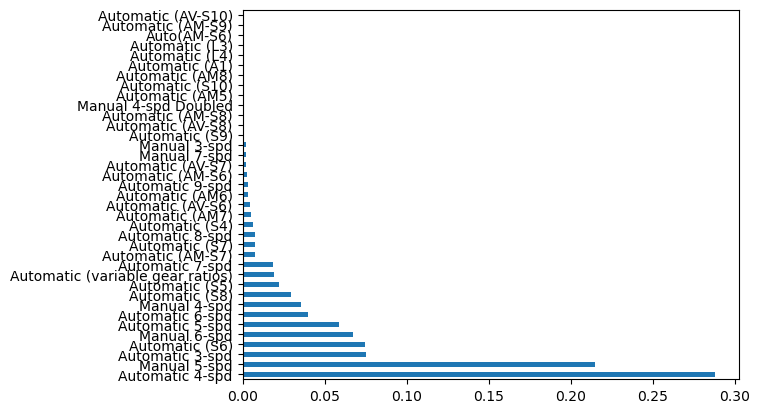

In [13]:
vehiculos.transmision.value_counts(normalize=True).plot.barh();

Hay demasiados tipo de transmision. Pero no hay una clase que ocupe gran parte del dataset sino que esta muy distrinuido

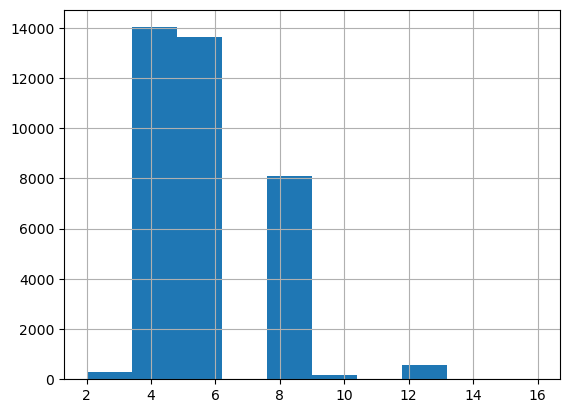

In [14]:
vehiculos.cilindros.hist();

En cuanto a cilindradas vemos que hay un gran mayoria de 4 cilindros .Esta distribuido de forma correcta

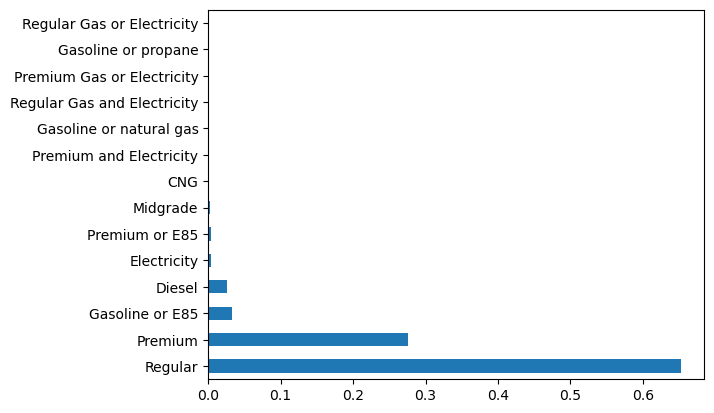

In [22]:
vehiculos.combustible.value_counts(normalize=True).plot.barh();

Aqui vemos que los que usan gasolina regular son el 65%.

### VALORES INEXISTENTES

In [15]:
n_records = len(vehiculos)
def valores_inexistentes_col(df):
    for columna in df:
        print("{} | {} | {}".format(
            df[columna].name, len(df[df[columna].isnull()]) / (1.0*n_records), df[columna].dtype
        ))

valores_inexistentes_col(vehiculos)

fabricante | 0.0 | object
modelo | 0.0 | object
year | 0.0 | int64
desplazamiento | 5.43611209263135e-05 | float64
cilindros | 8.154168138947025e-05 | float64
transmision | 5.43611209263135e-05 | object
traccion | 0.021445462205430674 | object
clase | 0.0 | object
combustible | 0.0 | object
consumo | 0.0 | int64
co2 | 0.0 | float64


Se ve que campo de traccion, cilindros y transmision tienen valores inexistentes.Sin embargo son cantidades despreciables 
(maximo es la variable de traccion con un 2% inexistentes)

### VALORES EXTREMOS (OUTLIERS)

In [16]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for columna in df:
        if df[columna].dtype != np.object:
            n_outliers = len(df[np.abs(stats.zscore(df[columna])) > 3])    
            print("{} | {} | {}".format(
                df[columna].name,
                n_outliers,
                df[columna].dtype
        ))

outliers_col(vehiculos)

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 400 | int64
co2 | 221 | float64


C:\Users\54296\AppData\Local\Temp\ipykernel_18316\510012546.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[columna].dtype != np.object:


Se ve que en consumo y CO2 hay unos cuantos valores extremos

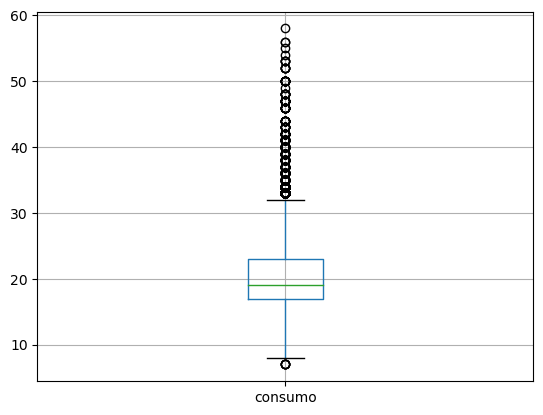

In [17]:
vehiculos.boxplot(column='consumo');

Se ve que tenemos outliers por arriba y por debajo

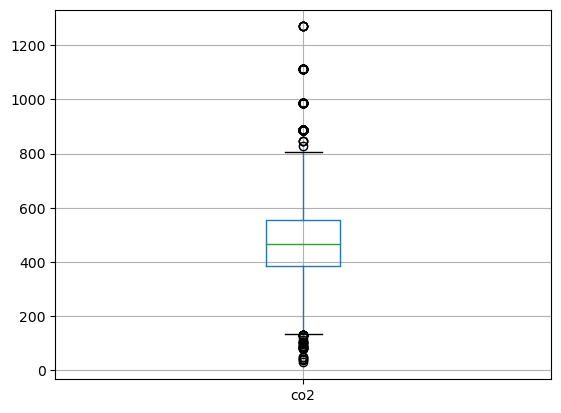

In [18]:
vehiculos.boxplot(column='co2');

Vemos que en cuanto a consumo hay algunos coches que contaminan mas de lo normal y otros que contaminan menos de lo normal, tambien vemos que hay coches que no contaminan nada!

## HAY AUTOS QUE NO CONSUMAN GASOLINA EN EL DATASET ??

In [19]:
vehiculos[vehiculos.co2==0].combustible.unique()

array([], dtype=object)

In [20]:
vehiculos.combustible.unique()

array(['Regular', 'Premium', 'Diesel', 'Premium and Electricity',
       'Premium or E85', 'Premium Gas or Electricity', 'Gasoline or E85',
       'Gasoline or natural gas', 'CNG', 'Regular Gas or Electricity',
       'Midgrade', 'Regular Gas and Electricity', 'Gasoline or propane'],
      dtype=object)

Se ve que en el dataset hay vehiculos hibridos y electricos puro.
Como el objetivo es la contaminacion,tendriamos que remover aquellos vehiculos que no contaminan

In [21]:
vehiculos_no_electricos = vehiculos[vehiculos.co2>0]

Volvemos a revisar los datos con el nuevo dataset

In [22]:
outliers_col(vehiculos_no_electricos)

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 400 | int64
co2 | 221 | float64


C:\Users\54296\AppData\Local\Temp\ipykernel_18316\510012546.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[columna].dtype != np.object:


In [23]:
valores_duplicados_col(vehiculos_no_electricos)

fabricante | 0.1-0.0 | object
modelo | 0.005-0.0 | object
year | 0.038-0.007 | int64
desplazamiento | 0.096-0.0 | float64
cilindros | 0.381-0.0 | float64
transmision | 0.288-0.0 | object
traccion | 0.352-0.005 | object
clase | 0.145-0.0 | object
combustible | 0.654-0.0 | object
consumo | 0.097-0.0 | int64
co2 | 0.084-0.0 | float64


### VALORES INEXISTENTES

In [24]:
valores_inexistentes_col(vehiculos)

fabricante | 0.0 | object
modelo | 0.0 | object
year | 0.0 | int64
desplazamiento | 5.43611209263135e-05 | float64
cilindros | 8.154168138947025e-05 | float64
transmision | 5.43611209263135e-05 | object
traccion | 0.021445462205430674 | object
clase | 0.0 | object
combustible | 0.0 | object
consumo | 0.0 | int64
co2 | 0.0 | float64


Ahora vemos que no hay valores inexistentes extremos en ninguna variable. La variable con mayor numero de valores inexistentes es traccion (2%). Obviamente, los coches electricos no tienen motor de gasolina y por tanto, no tienen cilindros

## CONCLUSION 

*Hay 1506 records duplicados (los hemos removido)

*las variables desplazamiento, cilindros, transmision y traccion tienen valores inexistentes

*La variable combustible tiene una clase dominante (65% de coches tienen combustible Regular)

*hay un outlier en las variables co2 y consumo

*Hay coches hibridos y coches electricos (hemos removido estos ultimos ya que no contaminan).

## EXPORTAMOS

In [25]:
vehiculos_no_electricos.to_csv(r"C:\Users\54296\Desktop\Data Science\Analisis de datos\vehiculos.2.limpio_original.csv", index=False)